In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# color values
COLORS={
    'Red':(255,0,0),
    'Green':(0,255,0),
    'Blue':(0,0,255),
    'Yellow':(255,255,0),
    'Orange':(255,128,0),
    'Purple':(128,0,255),
    'Cyan':(0,255,255),
    'White':(255,255,255),
    'Black':(0,0,0),
    'Gray':(128,128,128),
    'Pink':(255,0,255),
    'Brown':(128,42,24),
}


In [12]:
df=pd.read_csv('data.csv')
df.head()

,A1,A2,A3,Output
0,6,4,Red,Y
1,3,9,Green,Y
2,8,2,Blue,Y
3,1,10,Yellow,N
4,2,3,Purple,N


In [13]:
color_index=2
class_index=3

In [14]:
X=df.values.tolist();
X

[[6, 4, 'Red', 'Y'],
 [3, 9, 'Green', 'Y'],
 [8, 2, 'Blue', 'Y'],
 [1, 10, 'Yellow', 'N'],
 [2, 3, 'Purple', 'N'],
 [7, 8, 'Orange', 'Y'],
 [4, 5, 'Pink', 'N'],
 [9, 6, 'Cyan', 'N'],
 [5, 1, 'Brown', 'Y'],
 [10, 7, 'Gray', 'Y'],
 [2, 8, 'Black', 'Y'],
 [5, 3, 'White', 'Y'],
 [7, 1, 'Red', 'N'],
 [6, 10, 'Green', 'N'],
 [4, 9, 'Blue', 'Y'],
 [8, 6, 'Yellow', 'N'],
 [3, 2, 'Purple', 'N'],
 [1, 7, 'Orange', 'N'],
 [9, 4, 'Pink', 'Y'],
 [10, 5, 'Cyan', 'Y'],
 [2, 6, 'Brown', 'Y'],
 [3, 8, 'Gray', 'Y'],
 [4, 1, 'Black', 'Y'],
 [5, 10, 'White', 'N'],
 [7, 9, 'Red', 'Y'],
 [6, 3, 'Green', 'Y'],
 [8, 5, 'Blue', 'N'],
 [1, 2, 'Yellow', 'Y'],
 [9, 7, 'Purple', 'N'],
 [10, 4, 'Orange', 'Y'],
 [3, 6, 'Pink', 'N'],
 [5, 8, 'Cyan', 'Y'],
 [2, 10, 'Brown', 'N'],
 [4, 7, 'Gray', 'Y'],
 [6, 1, 'Black', 'Y'],
 [8, 9, 'White', 'N']]

In [15]:
m = len(df)

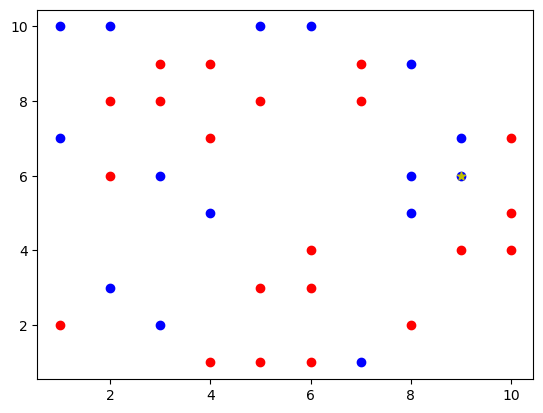

In [16]:
for i in range(m):
    if X[i][class_index]=='Y':
        plt.scatter(X[i][0],X[i][1],c='r',label='red')
    else:
        plt.scatter(X[i][0],X[i][1],c='b',label='blue')

xt=[9,6,'Yellow']
plt.scatter(xt[0],xt[1],c='y',label='test',marker='*')
plt.show()

In [10]:
def calc_color_diff(c1,c2):
    r1,g1,b1=COLORS[c1]
    r2,g2,b2=COLORS[c2]
    return (r1-r2)**2+(g1-g2)**2+(b1-b2)**2

def calc_distance(x1,x2):
    distance = 0
    for i in range(len(x1) - 1):
        if i==color_index:
            distance+=calc_color_diff(x1[i],x2[i])
        else:
            distance+=(x1[i]-x2[i])**2

    return np.sqrt(distance)


In [84]:
def KNN(target,X,k=6):
    vals = []
    for i in range(m):
        distance = calc_distance(target,X[i])
        vals.append((distance,X[i][class_index])) # distance,targetlabel
    vals = sorted(vals)
    vals = vals[:k] # first k
    vals = np.array(vals)
    counts = np.unique(vals[:,1],return_counts = True) # sorted count 
    index=counts[1].argmax() # max count index
    print(counts)
    return counts[0][index]
    

In [85]:
KNN(xt,X)

(array(['N', 'Y'], dtype='<U32'), array([4, 2]))


'N'